# Setup

In [1]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# Run experiments

In [199]:
base_exp_info = {
    'EXPERIMENT_NAME': 'conf_matrix_feat_exp_174',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
    ],
    
    # Expert demo parameters
    'DATASET': 'COMPAS',
    'TARGET_DATASET': 'Adult',
    'N_EXPERT_DEMOS': 5,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 20_000,
    'MIN_FREQ_FILL_PCT': .02,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .02,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#             'Dummy',
#         'DummyNoisy',
    ],
}

In [212]:
base_exp_info['N_TRIALS'] = 5
# base_exp_info['EPSILON'] = .06
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .05
base_exp_info['IGNORE_RESULTS_EPSILON'] = .12
base_exp_info['MAX_ITER'] = 7
base_exp_info['ALLOW_NEG_WEIGHTS'] = False
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS'] = True
base_exp_info['IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS'] = False

In [213]:
experiments = [
    {
        'EXPERT_ALGO': 'OptAcc',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtDemPar',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtEqOpp',
        'IRL_METHOD': 'FairIRL',
    },
]

In [214]:
# for exp_i, experiment in enumerate(experiments):
#     logging.info('\n\n')
#     logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
#     exp_info = dict(base_exp_info)
    
#     for k in experiment:
#         exp_info[k] = experiment[k]
        
#     run_experiment(exp_info)

In [215]:
exp_info = dict(base_exp_info)

In [216]:
source_X, source_y, source_feature_types = generate_dataset(
    exp_info['DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)
    
target_X, target_y, target_feature_types = generate_dataset(
    exp_info['TARGET_DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)

for f in source_feature_types['categoric']:
    source_X[f] = source_X[f].astype(str)
    
for f in target_feature_types['categoric']:
    target_X[f] = target_X[f].astype(str)

for exp_i, experiment in enumerate(experiments):
    logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    run_experiment(
        exp_info,
        source_X=source_X,
        source_y=source_y,
        source_feature_types=source_feature_types,
        target_X=target_X,
        target_y=target_y,
        target_feature_types=target_feature_types,
    )

INFO:root:


INFO:root:EXPERIMENT 1/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_174', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 5, 'EXPERT_ALGO': 'OptAcc', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.02, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 1, 'NON_EXPERT_ALGOS': ['OptAccNoisy'], 'N_TRIALS': 5, 'EPSILON': 0.05, 'IGNORE_RESULTS_EPSILON': 0.12, 'MAX_ITER': 7, 'ALLOW_NEG_WEIGHTS': False, 'DOT_WEIGHTS_FEAT_EXP': True, 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': True, 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.63642857 0.77854049 0.76337374]
 [0.64071429 0.71232987 0.6893507 ]
 [0.63       0.6463812  0.62415   ]
 [0.63045032 0.70398171 0.69455055]
 [0.62544675 0.69675043 0.71307806]]
INFO:root:muE_hold:
[

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.636,0.779,0.763,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
1,0.641,0.712,0.689,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
2,0.630,0.646,0.624,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
3,0.630,0.704,0.695,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
4,0.625,0.697,0.713,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.00,0.0,inf,inf,0.0,0.0
5,0.615,0.711,0.724,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.00,0.0,inf,inf,0.0,0.0
6,0.633,0.992,0.997,0,0.633,0.625,0.625,0.992,0.976,0.976,0.997,0.968,0.968,0.625,0.976,0.968,0.0,1.0,0.76,0.24,-0.0,0.068,0.046,0.0,0.0
7,0.633,0.992,0.998,0,0.633,0.625,0.625,0.992,0.976,0.976,0.998,0.968,0.968,0.625,0.976,0.968,0.0,2.0,0.76,0.24,0.0,0.068,0.046,0.0,0.0


INFO:root:muE_target:
[[0.73002755 0.85964361 0.88527948]
 [0.7337931  0.82415149 0.7648051 ]
 [0.72137931 0.84425456 0.80952381]
 [0.7062069  0.87713499 0.88655608]
 [0.73517241 0.90420228 0.92272727]]
INFO:root:muE_perf_target:
[[0.70936639 0.85492662 0.91513023]
 [0.73931034 0.81771027 0.74756372]
 [0.72137931 0.85388537 0.82380952]
 [0.70758621 0.88870523 0.89943162]
 [0.74068966 0.82083798 0.75909091]]
INFO:root:target domain muL = [0.74  0.996 0.89 ]
INFO:root:target domain muE = [0.725 0.862 0.854]
INFO:root:target domain muL_hold = [0.719 0.978 0.983]
INFO:root:target domain muL_perf_hold = [0.719 0.978 0.983]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.62071429 0.72561404 0.75048773]
 [0.63357143 0.66060235 0.74436695]
 [0.645      0.69587078 0.74187536]
 [0.64403145 0.74718025 0.77270108]
 [0.62759114 0.73073985 0.7425941 ]]
INFO:root:muE_hold:
[[0.64142857 0.83270908 0.79533523]
 [0.62571429 0.82357979 0.89415929]
 [0.62142857 0.83844253 0.80214101]
 [0.63285714 0.74585203 0.736

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.621,0.726,0.750,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.634,0.661,0.744,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.645,0.696,0.742,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.644,0.747,0.773,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.628,0.731,0.743,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.643,0.816,0.793,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.539,0.001,0.000,0,0.539,0.528,0.528,0.001,0.002,0.002,0.000,0.002,0.002,0.528,0.002,0.002,0.0,1.0,0.008,-0.763,-0.229,0.547,0.623,0.0,0.0
7,0.471,0.815,0.998,0,0.471,0.464,0.464,0.815,0.828,0.828,0.998,0.994,0.994,0.464,0.828,0.994,0.0,2.0,-0.000,-0.000,1.000,0.248,0.172,0.0,0.0
8,0.631,0.954,0.994,0,0.631,0.622,0.622,0.954,0.959,0.959,0.994,0.996,0.996,0.622,0.959,0.996,0.0,3.0,0.543,-0.000,0.457,0.111,0.080,0.0,0.0
9,0.631,0.954,0.994,0,0.631,0.622,0.622,0.954,0.959,0.959,0.994,0.996,0.996,0.622,0.959,0.996,0.0,4.0,0.635,-0.000,0.365,0.089,0.064,0.0,0.0


INFO:root:muE_target:
[[0.7231405  0.91850649 0.90977444]
 [0.73241379 0.9251462  0.95443925]
 [0.72689655 0.99022406 0.99360614]
 [0.73103448 0.99312152 0.84144144]
 [0.69103448 0.94427797 0.92700868]]
INFO:root:muE_perf_target:
[[0.72451791 0.8974026  0.87907268]
 [0.7337931  0.91461988 0.95443925]
 [0.72965517 0.9965035  0.95311168]
 [0.73103448 0.99312152 0.84144144]
 [0.68965517 0.96138527 0.94775556]]
INFO:root:target domain muL = [0.741 0.912 0.948]
INFO:root:target domain muE = [0.721 0.954 0.925]
INFO:root:target domain muL_hold = [0.735 0.872 0.809]
INFO:root:target domain muL_perf_hold = [0.735 0.872 0.809]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.63       0.70945311 0.72097431]
 [0.61571429 0.69684426 0.68873256]
 [0.61285714 0.67256583 0.65681989]
 [0.63259471 0.75939253 0.74601714]
 [0.63045032 0.75041083 0.75363702]]
INFO:root:muE_hold:
[[0.64857143 0.84977162 0.87775751]
 [0.62857143 0.80094697 0.82778353]
 [0.59428571 0.83937935 0.86408398]
 [0.62714286 0.76296788 0.767

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.630,0.709,0.721,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.616,0.697,0.689,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.613,0.673,0.657,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.633,0.759,0.746,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.630,0.750,0.754,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.633,0.689,0.695,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.371,0.977,0.983,0,0.371,0.378,0.378,0.977,0.960,0.960,0.983,0.992,0.992,0.378,0.960,0.992,0.0,1.0,-0.624,0.349,-0.027,0.163,0.156,0.0,0.0
7,0.631,0.972,0.981,0,0.631,0.623,0.623,0.972,0.948,0.948,0.981,0.982,0.982,0.623,0.948,0.982,0.0,2.0,0.014,0.986,0.000,0.251,0.119,0.0,0.0
8,0.631,0.972,0.980,0,0.631,0.623,0.623,0.972,0.948,0.948,0.980,0.982,0.982,0.623,0.948,0.982,0.0,3.0,0.010,0.990,0.000,0.252,0.119,0.0,0.0
9,0.565,0.992,0.925,0,0.631,0.556,0.623,0.972,0.989,0.948,0.980,0.896,0.982,0.623,0.948,0.982,0.0,4.0,0.000,1.000,-0.000,0.254,0.120,0.0,0.0


INFO:root:muE_target:
[[0.72176309 0.80616077 0.67865765]
 [0.72965517 0.9221584  0.89154705]
 [0.69931034 0.85744185 0.76552859]
 [0.72275862 0.88677107 0.91021127]
 [0.75172414 0.84749271 0.85035553]]
INFO:root:muE_perf_target:
[[0.72589532 0.79202215 0.61226461]
 [0.73103448 0.87361471 0.78628389]
 [0.68689655 0.87865483 0.7336487 ]
 [0.72137931 0.87906106 0.91960094]
 [0.75862069 0.80741587 0.85035553]]
INFO:root:target domain muL = [0.745 0.982 0.891]
INFO:root:target domain muE = [0.725 0.864 0.819]
INFO:root:target domain muL_hold = [0.717 0.969 0.978]
INFO:root:target domain muL_perf_hold = [0.717 0.969 0.978]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.65357143 0.77728657 0.87893449]
 [0.63857143 0.71608303 0.725     ]
 [0.62071429 0.75917283 0.80545862]
 [0.61401001 0.64645176 0.61268564]
 [0.64617584 0.76269123 0.77098039]]
INFO:root:muE_hold:
[[0.61571429 0.75888344 0.79624921]
 [0.62571429 0.82234689 0.84047652]
 [0.59       0.8038066  0.73938224]
 [0.64714286 0.76521739 0.768

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.654,0.777,0.879,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.639,0.716,0.725,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.621,0.759,0.805,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.614,0.646,0.613,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.646,0.763,0.771,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.624,0.672,0.674,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.634,0.973,0.988,0,0.634,0.618,0.618,0.973,0.972,0.972,0.988,0.978,0.978,0.618,0.972,0.978,0.0,1.0,0.073,0.927,-0.000,0.223,0.172,0.0,0.0
7,0.635,0.951,0.990,0,0.634,0.620,0.618,0.973,0.958,0.972,0.988,0.968,0.978,0.618,0.972,0.978,0.0,2.0,0.521,-0.000,0.479,0.110,0.089,0.0,0.0
8,0.635,0.951,0.990,0,0.634,0.620,0.618,0.973,0.958,0.972,0.988,0.968,0.978,0.618,0.972,0.978,0.0,3.0,0.835,0.000,0.165,0.038,0.031,0.0,0.0


INFO:root:muE_target:
[[0.76446281 0.90571533 0.84271978]
 [0.73241379 0.90389375 0.88804348]
 [0.71172414 0.96031047 0.87007241]
 [0.75586207 0.8993485  0.87308114]
 [0.71034483 0.92981271 0.8767507 ]]
INFO:root:muE_perf_target:
[[0.76584022 0.89758524 0.84271978]
 [0.73517241 0.9632997  0.94528986]
 [0.70482759 0.90961646 0.82019308]
 [0.75448276 0.89453309 0.86787281]
 [0.71172414 0.92819197 0.88127559]]
INFO:root:target domain muL = [0.748 0.89  0.903]
INFO:root:target domain muE = [0.735 0.92  0.87 ]
INFO:root:target domain muL_hold = [0.718 0.91  0.875]
INFO:root:target domain muL_perf_hold = [0.718 0.91  0.875]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.61928571 0.76747008 0.82493433]
 [0.63785714 0.7575471  0.768041  ]
 [0.64071429 0.76482832 0.74076142]
 [0.62830593 0.69610756 0.71319895]
 [0.62401716 0.73728647 0.73404255]]
INFO:root:muE_hold:
[[0.62142857 0.80543478 0.80439756]
 [0.61428571 0.74798504 0.72300197]
 [0.60571429 0.867406   0.80353417]
 [0.65428571 0.82169118 0.903

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.619,0.767,0.825,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.638,0.758,0.768,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.641,0.765,0.741,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.628,0.696,0.713,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.624,0.737,0.734,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.628,0.800,0.797,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.468,0.000,0.000,0,0.468,0.485,0.485,0.000,0.001,0.001,0.000,0.000,0.000,0.485,0.001,0.000,0.0,1.0,-0.044,-0.938,0.018,0.711,0.757,0.0,0.0
7,0.632,0.967,0.996,0,0.632,0.631,0.631,0.967,0.990,0.990,0.996,0.987,0.987,0.631,0.990,0.987,0.0,2.0,0.785,-0.000,0.215,0.051,0.043,0.0,0.0
8,0.632,0.967,0.996,0,0.632,0.631,0.631,0.967,0.990,0.990,0.996,0.987,0.987,0.631,0.990,0.987,0.0,3.0,0.754,0.000,0.246,0.059,0.049,0.0,0.0
9,0.632,0.967,0.996,0,0.632,0.631,0.631,0.967,0.990,0.990,0.996,0.987,0.987,0.631,0.990,0.987,0.0,4.0,0.758,0.000,0.242,0.058,0.048,0.0,0.0


INFO:root:muE_target:
[[0.72865014 0.84954026 0.75502392]
 [0.70344828 0.82408763 0.6988417 ]
 [0.68413793 0.92255331 0.83873986]
 [0.72137931 0.8385978  0.71667607]
 [0.71586207 0.92844977 0.8160309 ]]
INFO:root:muE_perf_target:
[[0.72727273 0.87256814 0.77416268]
 [0.7062069  0.82736096 0.6988417 ]
 [0.68275862 0.89794364 0.79865876]
 [0.72689655 0.84825963 0.72175221]
 [0.70758621 0.93167038 0.83437953]]
INFO:root:target domain muL = [0.736 0.943 0.993]
INFO:root:target domain muE = [0.711 0.873 0.765]
INFO:root:target domain muL_hold = [0.716 0.936 0.913]
INFO:root:target domain muL_perf_hold = [0.716 0.936 0.913]
INFO:root:


INFO:root:EXPERIMENT 2/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_174', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 5, 'EXPERT_ALGO': 'HardtDemPar', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.02, '

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.597,0.965,0.925,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.603,0.911,0.863,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.606,0.956,0.987,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.598,0.989,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.600,0.991,0.941,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.627,0.739,0.772,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.386,0.897,0.918,0,0.386,0.396,0.396,0.897,0.856,0.856,0.918,0.879,0.879,0.396,0.856,0.879,0.0,1.0,-0.084,0.599,0.317,0.043,0.071,0.0,0.0
7,0.630,0.955,0.964,0,0.630,0.613,0.613,0.955,0.977,0.977,0.964,0.955,0.955,0.613,0.977,0.955,0.0,2.0,0.391,0.482,0.127,0.013,0.008,0.0,0.0


INFO:root:muE_target:
[[0.72865014 0.93119499 0.74295955]
 [0.72275862 0.9432265  0.87653714]
 [0.7337931  0.96001573 0.76031746]
 [0.69931034 0.95629017 0.95802005]
 [0.70896552 0.96001769 0.95072464]]
INFO:root:muE_perf_target:
[[0.73966942 0.92565519 0.85407066]
 [0.70206897 0.97639402 0.87186424]
 [0.73103448 0.96648822 0.77460317]
 [0.68137931 0.97240074 0.91353383]
 [0.69931034 0.9340377  0.95403727]]
INFO:root:target domain muL = [0.726 0.966 0.995]
INFO:root:target domain muE = [0.719 0.95  0.858]
INFO:root:target domain muL_hold = [0.698 0.966 0.911]
INFO:root:target domain muL_perf_hold = [0.698 0.966 0.911]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.63214286 0.98178709 0.97959675]
 [0.57357143 0.98591816 0.95955897]
 [0.615      0.986822   0.93433827]
 [0.60471766 0.9947248  0.99798387]
 [0.61829878 0.98881529 0.98492982]]
INFO:root:muE_hold:
[[0.60714286 0.93505512 0.98152709]
 [0.59285714 0.97721738 0.96408734]
 [0.61       0.94129433 0.91988011]
 [0.58857143 0.9254902  0.867

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.632,0.982,0.980,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.000,0.000,inf,inf,0.0,0.0
1,0.574,0.986,0.960,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.000,0.000,inf,inf,0.0,0.0
2,0.615,0.987,0.934,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.000,0.000,inf,inf,0.0,0.0
3,0.605,0.995,0.998,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.000,0.000,inf,inf,0.0,0.0
4,0.618,0.989,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.0,0.000,0.000,inf,inf,0.0,0.0
5,0.631,0.794,0.820,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.0,0.000,0.000,inf,inf,0.0,0.0
6,0.462,0.982,0.977,0,0.462,0.468,0.468,0.982,0.979,0.979,0.977,0.967,0.967,0.468,0.979,0.967,0.0,1.0,0.0,0.547,0.453,0.003,0.019,0.0,0.0


INFO:root:muE_target:
[[0.72865014 0.84284414 0.70112782]
 [0.70482759 0.995866   0.95512821]
 [0.77103448 0.97776911 0.91633565]
 [0.72413793 0.99062509 0.943074  ]
 [0.71724138 0.87375662 0.86352657]]
INFO:root:muE_perf_target:
[[0.73002755 0.8444365  0.77694236]
 [0.71172414 0.93171775 0.89136302]
 [0.76137931 0.94205483 0.97840119]
 [0.72275862 0.9402188  0.80046709]
 [0.71724138 0.83708737 0.81541868]]
INFO:root:target domain muL = [0.539 0.954 0.958]
INFO:root:target domain muE = [0.729 0.936 0.876]
INFO:root:target domain muL_hold = [0.522 0.958 0.846]
INFO:root:target domain muL_perf_hold = [0.522 0.958 0.846]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.60571429 0.97789084 0.99291431]
 [0.615      0.99406706 0.89537668]
 [0.61214286 0.99949071 0.99908974]
 [0.59828449 0.967444   0.95292243]
 [0.58684775 0.96946606 0.96392389]]
INFO:root:muE_hold:
[[0.57428571 0.9891558  0.89494882]
 [0.59857143 0.95854033 0.92159888]
 [0.60714286 0.99537863 0.98290598]
 [0.59857143 0.9639426  0.985

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.606,0.978,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.615,0.994,0.895,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.612,0.999,0.999,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.598,0.967,0.953,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.587,0.969,0.964,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.642,0.727,0.752,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.366,0.900,0.913,0,0.366,0.393,0.393,0.900,0.885,0.885,0.913,0.858,0.858,0.393,0.885,0.858,0.0,1.0,-0.063,0.611,0.327,0.053,0.063,0.0,0.0
7,0.633,0.945,0.965,0,0.633,0.607,0.607,0.945,0.939,0.939,0.965,0.919,0.919,0.607,0.939,0.919,0.0,2.0,0.378,0.344,0.278,0.018,0.020,0.0,0.0


INFO:root:muE_target:
[[0.70798898 0.94643423 0.83538146]
 [0.69931034 0.99830401 0.9036036 ]
 [0.7062069  0.95220851 0.926859  ]
 [0.68413793 0.98482289 0.96444122]
 [0.68965517 0.98835772 0.97961407]]
INFO:root:muE_perf_target:
[[0.70798898 0.88270915 0.77060932]
 [0.69517241 0.99360469 0.8490991 ]
 [0.70758621 0.90555873 0.91751321]
 [0.6662069  0.91502564 0.9586357 ]
 [0.68689655 0.95274401 0.83986928]]
INFO:root:target domain muL = [0.717 0.983 0.92 ]
INFO:root:target domain muE = [0.697 0.974 0.922]
INFO:root:target domain muL_hold = [0.712 0.959 0.829]
INFO:root:target domain muL_perf_hold = [0.712 0.959 0.829]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.575      0.99185997 0.99097998]
 [0.59928571 0.96616106 0.89778953]
 [0.6        0.97873297 0.98431809]
 [0.60972123 0.9897359  0.95848585]
 [0.61329521 0.99067921 0.96307602]]
INFO:root:muE_hold:
[[0.60285714 0.96447969 0.97812523]
 [0.56714286 0.95442634 0.83300265]
 [0.62714286 0.96028404 0.9486163 ]
 [0.56428571 0.94993577 0.994

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.575,0.992,0.991,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.599,0.966,0.898,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.600,0.979,0.984,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.610,0.990,0.958,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.613,0.991,0.963,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.626,0.717,0.694,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.377,0.983,0.990,0,0.377,0.385,0.385,0.983,0.968,0.968,0.990,0.987,0.987,0.385,0.968,0.987,0.0,1.0,-0.056,0.520,0.424,0.015,0.018,0.0,0.0
7,0.624,0.990,0.999,0,0.624,0.617,0.617,0.990,0.968,0.968,0.999,0.995,0.995,0.617,0.968,0.995,0.0,2.0,0.522,0.373,0.105,0.014,0.016,0.0,0.0


INFO:root:muE_target:
[[0.69421488 0.95824972 0.9047619 ]
 [0.73793103 0.96791969 0.95876289]
 [0.71172414 0.94560622 0.91363636]
 [0.72827586 0.94876555 0.73872786]
 [0.71172414 0.97719539 0.95815296]]
INFO:root:muE_perf_target:
[[0.70247934 0.99122262 0.87570028]
 [0.7337931  0.96030919 0.98416789]
 [0.70344828 0.97008423 0.97272727]
 [0.73103448 0.97308962 0.80072464]
 [0.70896552 0.97397996 0.92207792]]
INFO:root:target domain muL = [0.739 0.979 0.976]
INFO:root:target domain muE = [0.717 0.96  0.895]
INFO:root:target domain muL_hold = [0.724 0.997 0.998]
INFO:root:target domain muL_perf_hold = [0.724 0.997 0.998]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.60928571 0.99963494 0.98500959]
 [0.605      0.98631579 0.95161846]
 [0.60428571 0.99598271 0.94689548]
 [0.59899929 0.99064188 0.93624567]
 [0.58827734 0.98046563 0.96107219]]
INFO:root:muE_hold:
[[0.61714286 0.99014955 0.99294686]
 [0.60285714 0.94330601 0.99810558]
 [0.61571429 0.93580416 0.81338912]
 [0.61857143 0.96651194 0.956

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.609,1.000,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.605,0.986,0.952,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.604,0.996,0.947,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.599,0.991,0.936,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.588,0.980,0.961,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.636,0.657,0.654,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.385,0.981,0.993,0,0.385,0.388,0.388,0.981,0.953,0.953,0.993,0.974,0.974,0.388,0.953,0.974,0.0,1.0,-0.057,0.510,0.432,0.017,0.015,0.0,0.0
7,0.629,0.941,0.961,0,0.629,0.634,0.634,0.941,0.937,0.937,0.961,0.911,0.911,0.634,0.937,0.911,0.0,2.0,0.567,0.269,0.164,0.019,0.016,0.0,0.0
8,0.628,0.982,0.976,0,0.628,0.631,0.631,0.982,0.973,0.973,0.976,0.965,0.965,0.631,0.973,0.965,0.0,3.0,0.053,0.947,-0.000,0.008,0.012,0.0,0.0


INFO:root:muE_target:
[[0.68732782 0.91914857 0.89035088]
 [0.73103448 0.976      0.93018593]
 [0.72275862 0.95631846 0.90719697]
 [0.72965517 0.93599409 0.83694746]
 [0.72965517 0.98817254 0.88967136]]
INFO:root:muE_perf_target:
[[0.684573   0.95687462 0.90285088]
 [0.72827586 0.9464     0.94440394]
 [0.71448276 0.84187835 0.99289773]
 [0.72551724 0.99290466 0.97331109]
 [0.72965517 0.95879121 0.82763246]]
INFO:root:target domain muL = [0.745 0.956 0.982]
INFO:root:target domain muE = [0.72  0.955 0.891]
INFO:root:target domain muL_hold = [0.723 0.935 0.915]
INFO:root:target domain muL_perf_hold = [0.723 0.935 0.915]
INFO:root:


INFO:root:EXPERIMENT 3/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_174', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 5, 'EXPERT_ALGO': 'HardtEqOpp', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.02, 'R

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.601,0.914,0.966,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.605,0.965,0.931,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.594,0.920,0.988,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.599,0.918,0.981,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.603,0.917,0.916,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.622,0.700,0.704,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.379,0.895,0.909,0,0.379,0.386,0.386,0.895,0.915,0.915,0.909,0.948,0.948,0.386,0.915,0.948,0.0,1.0,-0.044,0.485,0.472,0.024,0.024,0.0,0.0
7,0.620,0.886,0.899,0,0.620,0.613,0.613,0.886,0.911,0.911,0.899,0.948,0.948,0.613,0.911,0.948,0.0,2.0,0.451,0.295,0.254,0.020,0.020,0.0,0.0


INFO:root:muE_target:
[[0.72865014 0.94117647 0.99202552]
 [0.72551724 0.81999191 0.83671971]
 [0.75034483 0.91295999 0.96937799]
 [0.70206897 0.98533026 0.92      ]
 [0.72413793 0.82858161 0.71711457]]
INFO:root:muE_perf_target:
[[0.73002755 0.91993464 0.99043062]
 [0.73103448 0.82316148 0.88935129]
 [0.75172414 0.92069993 0.96626794]
 [0.70482759 0.99646697 0.96      ]
 [0.72413793 0.83563792 0.71216407]]
INFO:root:target domain muL = [0.731 0.986 0.937]
INFO:root:target domain muE = [0.726 0.898 0.887]
INFO:root:target domain muL_hold = [0.715 0.958 0.856]
INFO:root:target domain muL_perf_hold = [0.715 0.958 0.856]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.60428571 0.91173038 0.92243068]
 [0.58714286 0.94058568 0.9528759 ]
 [0.60857143 0.90530379 0.94793645]
 [0.61186562 0.97725635 0.98951034]
 [0.6154396  0.97866139 0.98448066]]
INFO:root:muE_hold:
[[0.58142857 0.90327255 0.924099  ]
 [0.59428571 0.91266031 0.94097331]
 [0.58       0.94897959 0.94057428]
 [0.59428571 0.95261721 0.990

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.604,0.912,0.922,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.587,0.941,0.953,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.609,0.905,0.948,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.612,0.977,0.990,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.615,0.979,0.984,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.624,0.747,0.741,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.364,0.994,0.994,0,0.364,0.389,0.389,0.994,0.966,0.966,0.994,0.983,0.983,0.389,0.966,0.983,0.0,1.0,-0.053,0.450,0.497,0.024,0.016,0.0,0.0
7,0.640,0.930,0.940,0,0.640,0.615,0.615,0.930,0.899,0.899,0.940,0.946,0.946,0.615,0.899,0.946,0.0,2.0,0.491,0.222,0.288,0.022,0.021,0.0,0.0


INFO:root:muE_target:
[[0.69972452 0.89438451 0.97248942]
 [0.71310345 0.91840355 0.84388271]
 [0.69103448 0.92443271 0.85743924]
 [0.72413793 0.99947306 0.90430622]
 [0.72689655 0.85758449 0.73004695]]
INFO:root:muE_perf_target:
[[0.69421488 0.95567399 0.85071181]
 [0.69931034 0.99113082 0.80040445]
 [0.69517241 0.90716426 0.8283936 ]
 [0.73931034 0.97426297 0.9138756 ]
 [0.72       0.86684375 0.69307512]]
INFO:root:target domain muL = [0.279 0.945 0.987]
INFO:root:target domain muE = [0.711 0.919 0.862]
INFO:root:target domain muL_hold = [0.288 0.948 0.954]
INFO:root:target domain muL_perf_hold = [0.288 0.948 0.954]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.61285714 0.92249228 0.97895568]
 [0.60857143 0.90421584 0.91377378]
 [0.60142857 0.95087882 0.98621324]
 [0.61258041 0.97607658 0.91304822]
 [0.61758399 0.92150519 0.9798197 ]]
INFO:root:muE_hold:
[[0.58857143 0.92175704 0.91203944]
 [0.57285714 0.87646185 0.97306757]
 [0.58428571 0.89156568 0.99863946]
 [0.58       0.9235032  0.955

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.613,0.922,0.979,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.609,0.904,0.914,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.601,0.951,0.986,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.613,0.976,0.913,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.618,0.922,0.980,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.620,0.702,0.678,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.376,0.996,0.998,0,0.376,0.399,0.399,0.996,0.999,0.999,0.998,0.983,0.983,0.399,0.999,0.983,0.0,1.0,-0.025,0.450,0.525,0.029,0.043,0.0,0.0
7,0.637,0.947,0.980,0,0.637,0.617,0.617,0.947,0.950,0.950,0.980,0.982,0.982,0.617,0.950,0.982,0.0,2.0,0.560,0.177,0.263,0.018,0.027,0.0,0.0


INFO:root:muE_target:
[[0.73415978 0.98962264 0.96767913]
 [0.70068966 0.97       0.87914163]
 [0.75310345 0.92013808 0.90740741]
 [0.71172414 0.94216907 0.860405  ]
 [0.7337931  0.85735294 0.80995475]]
INFO:root:muE_perf_target:
[[0.74242424 0.99140461 0.94431464]
 [0.69241379 0.9732     0.97201717]
 [0.7462069  0.92580401 0.81944444]
 [0.71862069 0.95889432 0.95777682]
 [0.73517241 0.88161765 0.95022624]]
INFO:root:target domain muL = [0.745 0.937 0.908]
INFO:root:target domain muE = [0.727 0.936 0.885]
INFO:root:target domain muL_hold = [0.724 0.952 0.85 ]
INFO:root:target domain muL_perf_hold = [0.724 0.952 0.85 ]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.59857143 0.93327916 0.96786767]
 [0.60142857 0.87985332 0.93841716]
 [0.61714286 0.9138587  0.97666506]
 [0.5768406  0.98605555 0.9411346 ]
 [0.60471766 0.91056495 0.94298963]]
INFO:root:muE_hold:
[[0.59857143 0.87188209 0.82037037]
 [0.59       0.93663538 0.91350114]
 [0.57428571 0.9968986  0.95175197]
 [0.57142857 0.90911435 0.942

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.599,0.933,0.968,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
1,0.601,0.880,0.938,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
2,0.617,0.914,0.977,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
3,0.577,0.986,0.941,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
4,0.605,0.911,0.943,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,inf,inf,0.0,0.0
5,0.626,0.743,0.687,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.000,0.000,inf,inf,0.0,0.0
6,0.371,0.932,0.947,0,0.371,0.381,0.381,0.932,0.899,0.899,0.947,0.898,0.898,0.381,0.899,0.898,0.0,1.0,-0.06,0.331,0.610,0.014,0.014,0.0,0.0
7,0.629,0.997,0.971,0,0.629,0.620,0.620,0.997,0.956,0.956,0.971,0.958,0.958,0.620,0.956,0.958,0.0,2.0,0.49,0.109,0.401,0.016,0.019,0.0,0.0
8,0.634,0.942,0.984,0,0.629,0.624,0.620,0.997,0.916,0.956,0.971,0.929,0.958,0.620,0.956,0.958,0.0,3.0,0.23,0.000,0.770,0.014,0.010,0.0,0.0


INFO:root:muE_target:
[[0.70385675 0.92416312 0.9640743 ]
 [0.72965517 0.98922486 0.87884615]
 [0.75586207 0.92679633 0.86121076]
 [0.70206897 0.81069522 0.71069307]
 [0.67724138 0.97163327 0.90279096]]
INFO:root:muE_perf_target:
[[0.70661157 0.92738892 0.94896918]
 [0.72551724 0.93013686 0.81538462]
 [0.73655172 0.89658743 0.85224215]
 [0.69931034 0.86084663 0.83069307]
 [0.67448276 0.95143125 0.90279096]]
INFO:root:target domain muL = [0.747 0.888 0.88 ]
INFO:root:target domain muE = [0.714 0.925 0.864]
INFO:root:target domain muL_hold = [0.729 0.873 0.787]
INFO:root:target domain muL_perf_hold = [0.729 0.873 0.787]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.59642857 0.9611188  0.98905833]
 [0.6        0.9805222  0.97997128]
 [0.585      0.93441891 0.91047619]
 [0.59899929 0.89552447 0.89261485]
 [0.59399571 0.97320847 0.98904696]]
INFO:root:muE_hold:
[[0.59428571 0.90589728 0.97404242]
 [0.60142857 0.87748741 0.91158634]
 [0.57142857 0.95785861 0.91269841]
 [0.59       0.98564483 0.918

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.596,0.961,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.600,0.981,0.980,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.585,0.934,0.910,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.599,0.896,0.893,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.594,0.973,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.616,0.725,0.737,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.371,0.950,0.957,0,0.371,0.374,0.374,0.950,0.969,0.969,0.957,0.999,0.999,0.374,0.969,0.999,0.0,1.0,-0.050,0.497,0.453,0.012,0.030,0.0,0.0
7,0.630,0.949,0.956,0,0.630,0.626,0.626,0.949,0.967,0.967,0.956,0.998,0.998,0.626,0.967,0.998,0.0,2.0,0.476,0.292,0.232,0.022,0.020,0.0,0.0
8,0.438,0.944,0.964,0,0.630,0.459,0.626,0.949,0.967,0.967,0.956,0.993,0.998,0.626,0.967,0.998,0.0,3.0,-0.000,0.000,1.000,0.004,0.056,0.0,0.0


INFO:root:muE_target:
[[0.71349862 0.88661833 0.96340426]
 [0.71448276 0.97314727 0.92186047]
 [0.72551724 0.92178009 0.8527172 ]
 [0.71310345 0.8545681  0.73138528]
 [0.70896552 0.91456758 0.82910714]]
INFO:root:muE_perf_target:
[[0.70936639 0.8693474  0.85617021]
 [0.72413793 0.9259353  0.99813953]
 [0.73655172 0.91114241 0.83402561]
 [0.72       0.86058587 0.76536797]
 [0.71172414 0.94357428 0.91803571]]
INFO:root:target domain muL = [0.729 0.985 0.982]
INFO:root:target domain muE = [0.715 0.91  0.86 ]
INFO:root:target domain muL_hold = [0.712 0.993 0.926]
INFO:root:target domain muL_perf_hold = [0.712 0.993 0.926]


# Compare results with source domain only

In [217]:
!rm ../../data/experiment_output/fair_irl/exp_info/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_results/.DS_Store

rm: ../../data/experiment_output/fair_irl/exp_info/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_results/.DS_Store: No such file or directory


In [218]:
# min_exp_timestamp = '2023-08-12 20:22:00'  # Cutoff for results of main text in AAAI submission
min_exp_timestamp = '2023-10-10 12:00:00'  # Cutoff for results on Appendix D.4 (progressively increasing expert)

def skip_by_name(info):
    return 'EXPERIMENT_NAME' not in info or info['EXPERIMENT_NAME'] != base_exp_info['EXPERIMENT_NAME']

DATASET: COMPAS


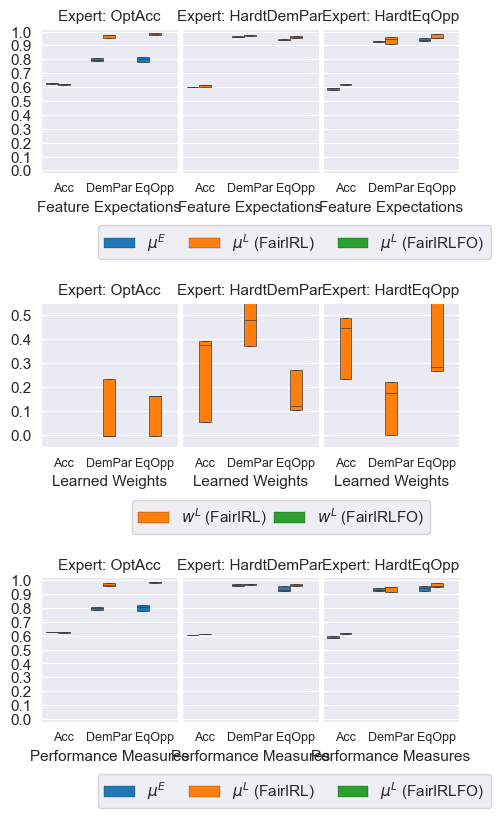

In [223]:
plt.rc('axes', titlesize=11)     # fontsize of the axes title
plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=9)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('figure', titlesize=11)  # fontsize of the figure title
    
fig, axes, mu_dfs, w_dfs, perf_dfs = plot_results_source_domain_only(
    feat_objective_set_names=base_exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
    perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    expert_algos=[
        'OptAcc',
        'HardtDemPar',
        'HardtEqOpp',
    ],
    dataset=base_exp_info['DATASET'],
    mu_noise_factor=.01,
    perf_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    perf_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
#     min_mu_value=.25,
#     max_mu_value=1,
#     min_w_value=-1,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    perf_yticks=np.linspace(0, 1, 11).round(1),
    mu_ylim=(-.02, 1.02),
    perf_ylim=(-.02, 1.02),
    mu_whis=[1, 99],
    w_yticks = np.linspace(0, .5, 6).round(2),
    w_ylim=(-.05, .55),
    w_whis=[5, 95]
)

# Compare results with target domain

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


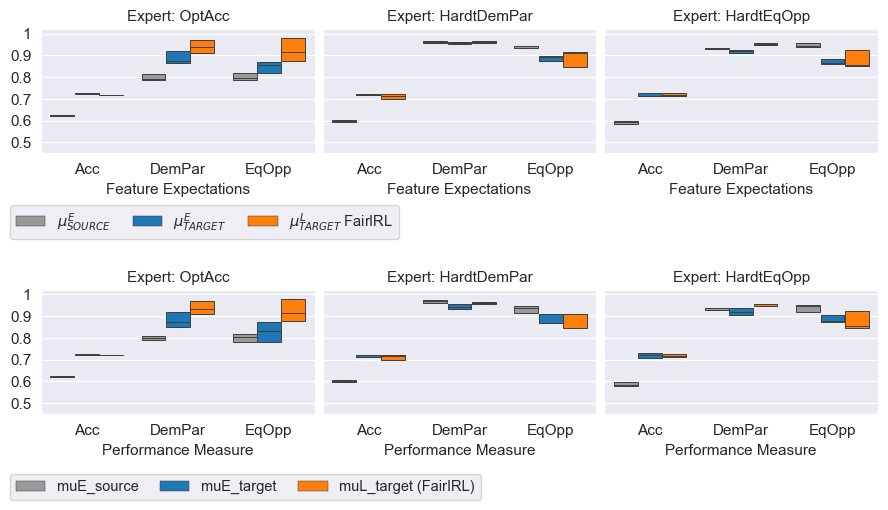

In [226]:
## plt.rc('axes', titlesize=11)     # fontsize of the axes title
plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=10.5)    # legend fontsize
plt.rc('figure', titlesize=11)  # fontsize of the figure title

result, mu_df, w_df, perf_df = plot_results_target_domain(
    feat_objective_set_names=base_exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
    perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    expert_algos=['OptAcc', 'HardtDemPar', 'HardtEqOpp'],
    source_dataset=base_exp_info['DATASET'],
    target_dataset=base_exp_info['TARGET_DATASET'],
    mu_noise_factor=.001,
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
    min_mu_value=.5,
#     mu_yticks=[.6, .7, .8, .9, 1],
    mu_yticks=[.4, .5, .6, .7, .8, .9, 1],
    mu_ylim=(.45, 1.02),
    mu_whis=[5, 95],
    perf_noise_factor=.01,
    perf_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    perf_yticks=np.linspace(0, 1, 11).round(1),
    perf_ylim=(-.02, 1.02),
)

# Scratch

In [170]:
exp_info = dict(base_exp_info)
exp_info['FEAT_EXP_OBJECTIVE_NAMES'] = [
    'TPR_Z0', 'TPR_Z1',
#     'TNR_Z0', 'TNR_Z1',
    'FPR_Z0', 'FPR_Z1',
#     'FNR_Z0', 'FNR_Z1',
#     'Acc',
#     'DemPar',
#     'EqOpp',
#     'PredPar',
]
exp_info['RESTRICT_Y_ACTION'] = True

X, y, ft = generate_compas_dataset(20_000)
# X, y, ft = generate_adult_dataset(20_000)

# Initiate objectives
objectives = []
for obj_name in exp_info['FEAT_EXP_OBJECTIVE_NAMES']:
    objectives.append(OBJ_LOOKUP_BY_NAME[obj_name]())
feat_obj_set = ObjectiveSet(objectives)
del objectives
# Reset the objective set since they get fitted in each trial run
feat_obj_set.reset()


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
)
del X, y


# Fit a classifier that predicts `y` from `X`.
clf = sklearn_clf_pipeline(
    feature_types=ft,
    clf_inst=RandomForestClassifier(),
)
clf.fit(X_train, y_train)

# Initiate variables needed to run IRL Loop
x_cols = (
    ft['boolean']
    + ft['categoric']
    + ft['continuous']
)
x_cols.remove('z')

# wi = [.2, .3, -.15, -.2]  # .598, .881, .906
# wi = [.195, .22, -.205, -.17]  # .608, .984, .994
wi = [.2, .3, .15, .2]  # .598, .881, .906
# wi = [.9, .02, .02]


reward_weights = { obj.name: wi[j] for j, obj in enumerate(feat_obj_set.objectives) }

test_df = X_test.copy()
test_df['y'] = y_test
# test_df = X_train.copy()
# test_df['y'] = y_train
# test_df['y'] = clf.predict(X_test)

clf_pol = compute_optimal_policy(
    clf_df=test_df,  # NOT the dataset used to train the C_{Y_Z,X} clf
    clf=clf,
    x_cols=x_cols,
    obj_set=feat_obj_set,
    reward_weights=reward_weights,
    skip_error_terms=True,
    method=exp_info['METHOD'],
    min_freq_fill_pct=exp_info['MIN_FREQ_FILL_PCT'],
)

demo = generate_demo(clf_pol, X_train, y_train, can_observe_y=False)
muj = feat_obj_set.compute_demo_feature_exp(demo)
print(f"\t\t muL = {np.round(muj, 3)}")


print('Acc', AccuracyObjective().compute_feat_exp(demo).round(3))
print('DemPar', DemographicParityObjective().compute_feat_exp(demo).round(3))
print('EqOpp', EqualOpportunityObjective().compute_feat_exp(demo).round(3))

display(demo.groupby(['z', 'y'])[['yhat']].agg(['count', 'mean', 'sum']))
display(demo.groupby(['z'])[['yhat']].agg(['count', 'mean', 'sum']))

		 muL = [0.748 0.776 0.503 0.396]
Acc 0.605
DemPar 0.947
EqOpp 0.972


yhat                  
    count      mean     sum
z y                        
0 0  4608  0.496745  2289.0
  1  4768  0.748112  3567.0
1 0  2650  0.604151  1601.0
  1  1970  0.776142  1529.0

yhat                  
  count      mean     sum
z                        
0  9376  0.624573  5856.0
1  4620  0.677489  3130.0